In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

import shap

In [7]:
data = pd.read_csv('abalone.data',
                   names=['sex', 'length', 'diameter', 'height',
                          'whole weight', 'shucked weight',
                          'viscera weight', 'shell weight',
                          'rings'])
print(len(data))
data.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0.5, 0, 'whole weight')

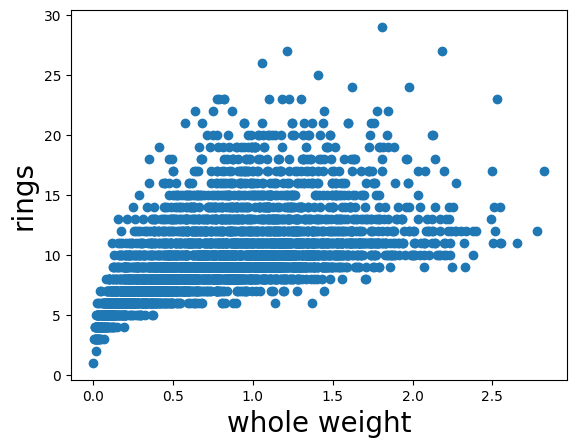

In [6]:
plt.scatter(data['whole weight'], data['rings'])
plt.ylabel('rings', size=20)
plt.xlabel('whole weight', size=20)

Text(0.5, 0, 'sex')

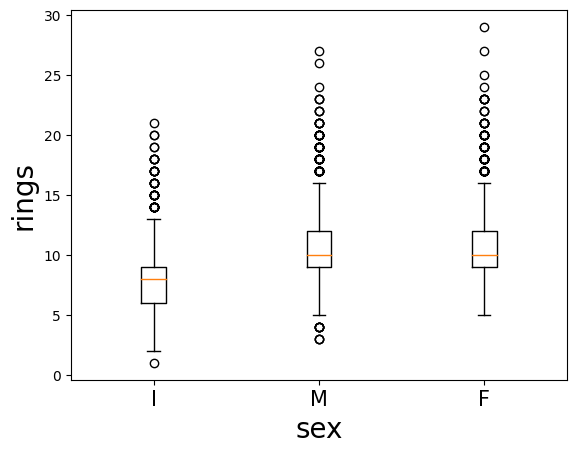

In [8]:
plt.boxplot(data[data.sex=='I']['rings'], positions=[1])
plt.boxplot(data[data.sex=='M']['rings'], positions=[2])
plt.boxplot(data[data.sex=='F']['rings'], positions=[3])

plt.xticks(ticks=[1,2,3], labels=['I', 'M', 'F'], size=15)
plt.ylabel('rings', size=20)
plt.xlabel('sex', size=20)

<Axes: >

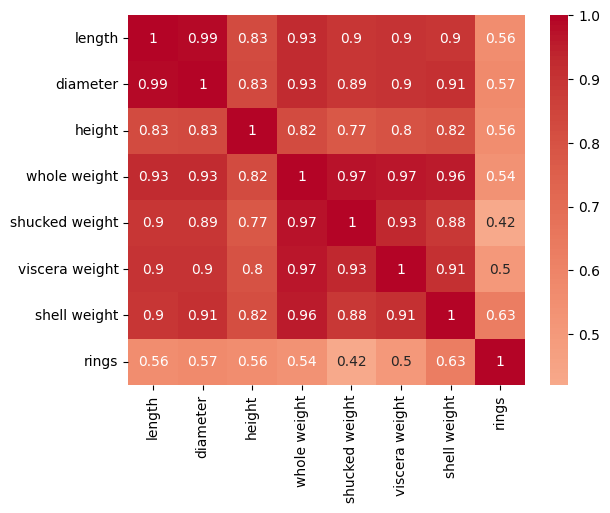

In [16]:
cont=['length', 'diameter', 'height',
       'whole weight', 'shucked weight',
       'viscera weight', 'shell weight',
        'rings']

corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True)

In [22]:
y = data['rings']
X = data[['sex', 'length','height',
            'shucked weight', 'viscera weight', 'shell weight']]

In [23]:
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)
X.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


In [24]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

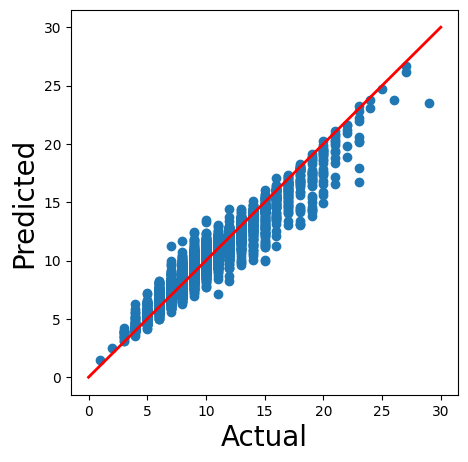

In [25]:
y_pred = model.predict(X)

plt.figure(figsize=(5,5))

plt.scatter(y, y_pred)
plt.plot([0, 30],
         [0, 30],
         color='r',
         linestyle='-',
         linewidth=2)

plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)

In [26]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

[14:38:37] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[14:38:38] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [27]:
np.shape(shap_values.values)

(4177, 8)

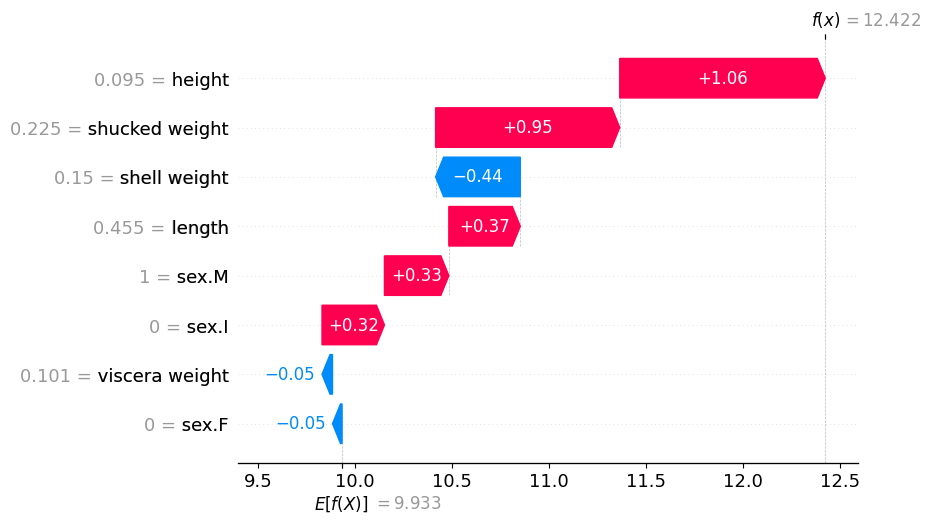

In [29]:
shap.plots.waterfall(shap_values[0])

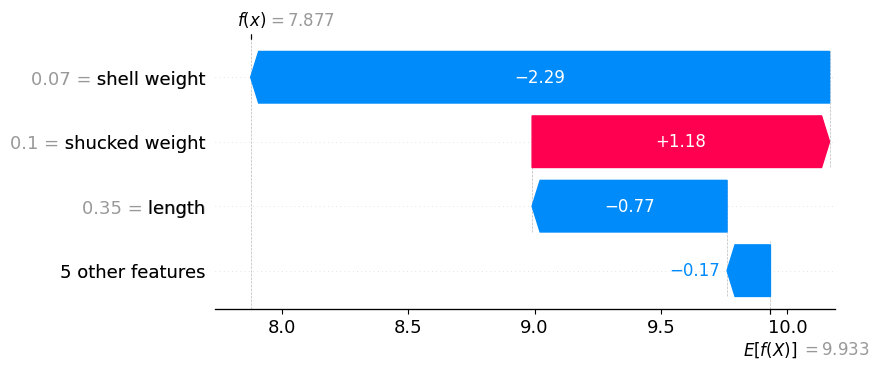

In [30]:
shap.plots.waterfall(shap_values[1], max_display=4)

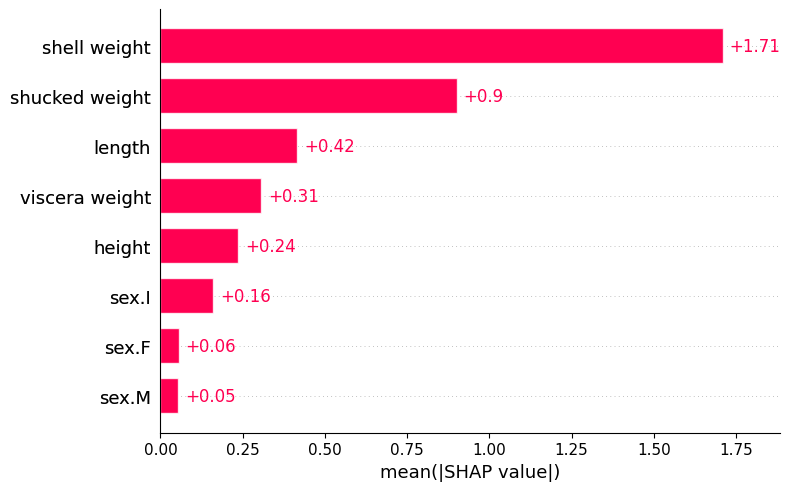

In [33]:
shap.plots.bar(shap_values)

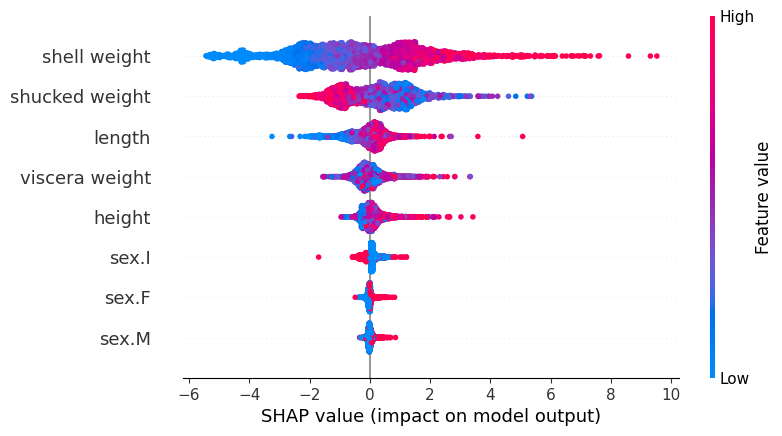

In [35]:
shap.plots.beeswarm(shap_values)

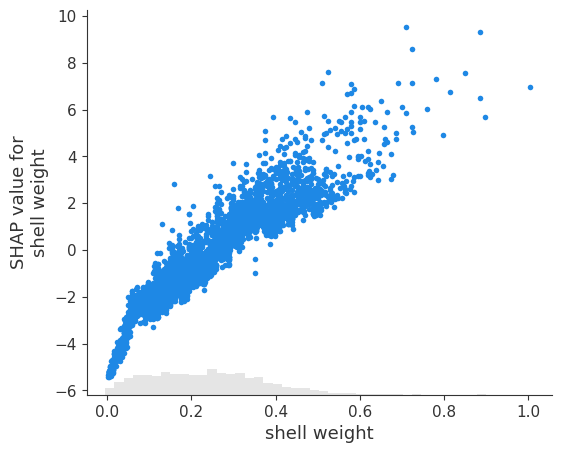

In [36]:
shap.plots.scatter(shap_values[:,"shell weight"])

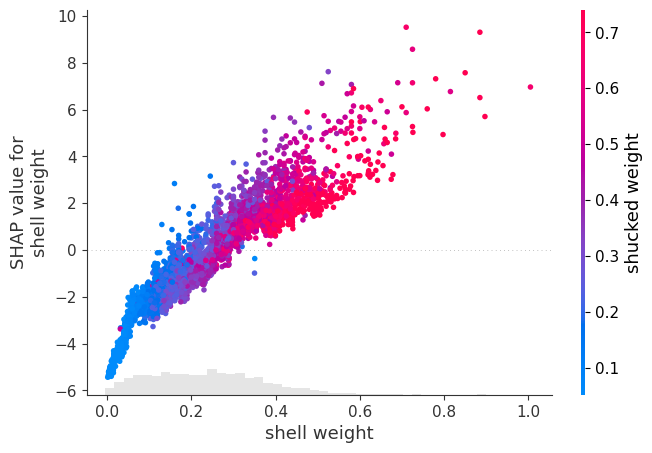

In [38]:
shap.plots.scatter(shap_values[:,"shell weight"],
                   color=shap_values[:,"shucked weight"])

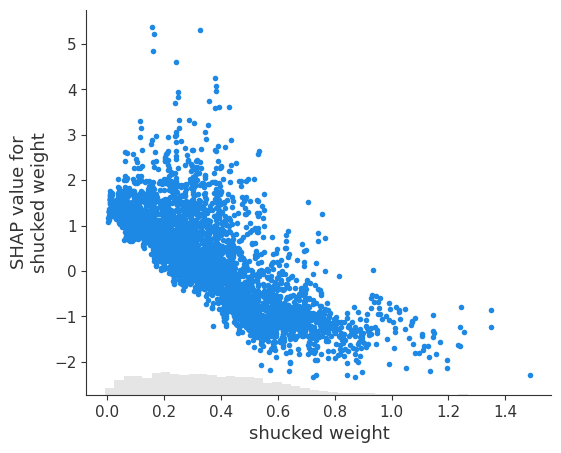

In [39]:
shap.plots.scatter(shap_values[:,"shucked weight"])

In [40]:
shap_values

.values =
array([[ 0.36806285,  1.0587054 ,  0.94834965, ...,  0.3316413 ,
        -0.04919233,  0.3216473 ],
       [-0.7708986 , -0.21779695,  1.176285  , ...,  0.05278974,
        -0.0395156 ,  0.49588168],
       [ 0.15351889, -0.02277692,  0.47050092, ...,  0.04105941,
         0.04848656,  0.12317639],
       ...,
       [ 0.14958209,  0.32025054, -1.4478747 , ...,  0.04284297,
         0.01527823,  0.02549139],
       [-0.04009023, -0.09120232, -0.919325  , ...,  0.05648781,
         0.05737196,  0.09682811],
       [ 0.61490464,  0.388789  , -0.55129325, ...,  0.05122245,
         0.00867648,  0.07278913]], dtype=float32)

.base_values =
array([9.93266, 9.93266, 9.93266, ..., 9.93266, 9.93266, 9.93266],
      dtype=float32)

.data =
array([[0.455 , 0.095 , 0.2245, ..., 1.    , 0.    , 0.    ],
       [0.35  , 0.09  , 0.0995, ..., 1.    , 0.    , 0.    ],
       [0.53  , 0.135 , 0.2565, ..., 0.    , 1.    , 0.    ],
       ...,
       [0.6   , 0.205 , 0.5255, ..., 1.    , 0.    